![hodor.jpg](hodor.jpg)

# Interrupt when you hear only Hodor

# MongoClient - Connecting to MongoDB Atlas

In [134]:
import pymongo

client_atlas = MongoClient("mongodb://admin:<PASSWORD>@cluster0-shard-00-00-ydjii.mongodb.net:27017,cluster0-shard-00-01-ydjii.mongodb.net:27017,cluster0-shard-00-02-ydjii.mongodb.net:27017/testme?ssl=true&replicaSet=Cluster0-shard-0&authSource=admin")
print(client)

MongoClient(host=['cluster0-shard-00-01-ydjii.mongodb.net:27017', 'cluster0-shard-00-02-ydjii.mongodb.net:27017', 'cluster0-shard-00-00-ydjii.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, ssl=True, replicaset='Cluster0-shard-0', authsource='admin')


# Access the database and collection 
**Note that neither the database nor the collection are currently available on this cluster and will be created lazily on first insert**

In [ ]:
db_atlas = client_atlas['mugdb']
coll_atlas = db['mugcoll']

# insert_one()

In [135]:
print("I'll run 3 insert commands to MongoDB Atlas")

coll_atlas.insert_one({"name": "Ned", "clan": "Stark", "hasDied": True})
coll_atlas.insert_one({"name": "Sansa", "clan": "Stark", "hasDied": False})
coll_atlas.insert_one({"name": "Tyrion", "clan": "Lannister", "hasDied":False, "alias":"The Imp"})

I'll run 3 insert commands to MongoDB Atlas


# find_one()

In [136]:
print("Now I'll find one document")

coll_atlas.find_one()

Now I'll find one document


{'_id': ObjectId('5970e224c1f0791d6bdb92fb'),
 'clan': 'Stark',
 'hasDied': True,
 'name': 'Ned'}

# find() - get many documents

In [137]:
print("I'll like to find  documents where clan is Stark")

cursor = coll_atlas.find({"clan":"Stark"})
status = "What's dead may never die."

for starks in cursor:
    if not starks['hasDied']:
        status = "I'm still alive."
    print("Hello... My name is "+ starks['name'] + "." + status)

I'll like to find  documents where clan is Stark
Hello... My name is Ned.What's dead may never die.
Hello... My name is Sansa.I'm still alive.


# Query an ObjectID

In [140]:
print("Querying by ObjectID")

from bson.objectid import ObjectId

print("Let's copy the ObjectID from the previous find_one statement")

cursor = coll_atlas.find({"_id": ObjectId('5970e224c1f0791d6bdb92fb')})
for doc in cursor:
    print(doc)

Querying by ObjectID
Let's copy the ObjectID from the previous find_one statement
{'_id': ObjectId('5970e224c1f0791d6bdb92fb'), 'name': 'Ned', 'clan': 'Stark', 'hasDied': True}


# insert_many()

In [141]:
print('Let''s insert many documents')

lannisters = coll_atlas.insert_many([
{"name": "Cersei", "clan":"Lannister"},
{"name": "Jaime", "clan":"Lannister"}
])

print("I have inserted the following Lannisters")

lannisters.inserted_ids

Lets insert many documents
I have inserted the following Lannisters


[ObjectId('5970e288c1f0791d6bdb92fe'), ObjectId('5970e288c1f0791d6bdb92ff')]

# I hope you enjoyed this short GoT PyMongo Session

# However, this is not the end. Winter is Coming!


# Let's insert the data of all the different houses that we have in a collection named `pymongo_got` in `db_atlas` database

Data picked from https://github.com/ericdrowell/CheatSheetWorld/blob/master/src/entertainment/game-of-thrones.json

In [142]:
pymongo_got = db_atlas['pymongo_got']

pymongo_got.delete_many({})

got_houses = pymongo_got.insert_many(
[
    {
      "name": "Starks",
      "wikiSuffix": "House_Stark",
      "people": [
        {
          "name": "Eddard \"Ned\" Stark",
          "description": "Lord of Winterfell - Warden of the North - Hand of the King - Married to Catelyn (Tully) Stark",
          "imageSuffix": "eddard-stark",
          "wikiSuffix": "Eddard_Stark"
        },
        {
          "name": "Benjen Stark",
          "description": "Brother of Eddard Stark - First ranger of the Night's Watch",
          "imageSuffix": "benjen-stark",
          "wikiSuffix": "Benjen_Stark"
        },
        {
          "name": "Robb Stark",
          "description": "Son of Eddard and Catelyn Stark - Direwolf: Grey Wind",
          "imageSuffix": "robb-stark",
          "wikiSuffix": "Robb_Stark"
        },
        {
          "name": "Sansa Stark",
          "description": "Daughter of Eddard and Catelyn Stark - Direwolf: Lady",
          "imageSuffix": "sansa-stark",
          "wikiSuffix": "Sansa_Stark"
        },
        {
          "name": "Arya Stark",
          "description": "Daughter of Eddard and Catelyn Stark - Direwolf: Nymeria",
          "imageSuffix": "arya-stark",
          "wikiSuffix": "Arya_Stark"
        },
        {
          "name": "Brandon \"Bran\" Stark",
          "description": "Son of Eddard and Catelyn Stark - Direwolf: Summer",
          "imageSuffix": "brandon-stark",
          "wikiSuffix": "Brandon_Stark"
        },
        {
          "name": "Rickon Stark",
          "description": "Son of Eddard and Catelyn Stark - Direwolf: Shaggydog",
          "imageSuffix": "rickon-stark",
          "wikiSuffix": "Rickon_Stark"
        },
        {
          "name": "Jon Snow",
          "description": "Bastard son of Eddard Stark - Steweard in the Night's Watch - Direwolf: Ghost",
          "imageSuffix": "jon-snow",
          "wikiSuffix": "Jon_Snow"
        }
      ]
    },



    {
      "name": "Lannisters",
      "wikiSuffix": "House_Lannister",
      "people": [
        {
          "name": "Tywin Lannister",
          "description": "Lord of Casterly Rock - Warden of the West",
          "imageSuffix": "tywin-lannister",
          "wikiSuffix": "Tywin_Lannister"
        },
        {
          "name": "Tyrion Lannister",
          "description": "Son of Tywin Lannister - The Imp",
          "imageSuffix": "tyrion-lannister",
          "wikiSuffix": "Tyrion_Lannister"
        },
        {
          "name": "Jaime Lannister",
          "description": "The Kingslayer - Knight of the Kingsgaurd - Son of Tywin Lannister",
          "imageSuffix": "jaime-lannister",
          "wikiSuffix": "Jaime_Lannister"
        },
        {
          "name": "Queen Cersei (Lannister) Baratheon",
          "description": "Married to King Robert Baratheon - Daughter of Tywin Lannister",
          "imageSuffix": "cersei-lannister",
          "wikiSuffix": "Cersei_Lannister"
        }
      ]
    },


    {
      "name": "Baratheons",
      "wikiSuffix": "House_Baratheon",
      "people": [
        {
          "name": "King Robert Baratheon",
          "description": "The first of his name - Lord of the Seven Kingdoms",
          "imageSuffix": "robert-baratheon",
          "wikiSuffix": "Robert_Baratheon"
        },
        {
          "name": "Stannis Baratheon",
          "description": "Lord of Dragonstone - Master of Ships - Brother of Robert Baratheon",
          "imageSuffix": "stannis-baratheon",
          "wikiSuffix": "Stannis_Baratheon"
        },
        {
          "name": "Renly Baratheon",
          "description": "Lord of Storm's End - Master of Laws - Brother of Robert Baratheon",
          "imageSuffix": "renly-baratheon",
          "wikiSuffix": "Renly_Baratheon"
        },
        {
          "name": "Joffrey Baratheon",
          "description": "Heir to the Iron Throne - Son of Robert and Cersei Baratheon",
          "imageSuffix": "joffrey-baratheon",
          "wikiSuffix": "Joffrey_Baratheon"
        },
        {
          "name": "Tommen Baratheon",
          "description": "Son of Robert and Cersei Baratheon",
          "imageSuffix": "tommen-baratheon",
          "wikiSuffix": "Tommen_Baratheon"
        },
        {
          "name": "Myrcella Baratheon",
          "description": "Daughter of Robert and Cersei Baratheon",
          "imageSuffix": "myrcella-baratheon",
          "wikiSuffix": "Myrcella_Baratheon"
        }
      ]
    },




    {
      "name": "Targaryens",
      "wikiSuffix": "House_Targaryen",
      "people": [
        {
          "name": "Daenerys Targaryen",
          "description": "Stormborn - Khaleesi of the Dothraki - The Unburnt - Mother of Dragons - Daughter of Aerys II Targaryen \"The Mad King\"",
          "imageSuffix": "daenerys-targaryen",
          "wikiSuffix": "Daenerys_Targaryen"
        },
        {
          "name": "Viserys Targaryen",
          "description": "The Beggar King - Son of Aerys II Targaryen \"The Mad King\"",
          "imageSuffix": "viserys-targaryen",
          "wikiSuffix": "Viserys_Targaryen"
        }
      ]
    },



    {
      "name": "Greyjoys",
      "wikiSuffix": "House_Greyjoy",
      "people": [
        {
          "name": "Balon Greyjoy",
          "description": "Lord Reaper of Pyke - Head of House Greyjoy",
          "imageSuffix": "balon-greyjoy",
          "wikiSuffix": "Balon_Greyjoy"
        },
        {
          "name": "Theon Greyjoy",
          "description": "Ward of the Starks - Heir to the Iron Islands - Son of Balon Greyjoy",
          "imageSuffix": "theon-greyjoy",
          "wikiSuffix": "Theon_Greyjoy"
        },
        {
          "name": "Yara Greyjoy",
          "description": "Ironborn - Son of Balon Greyjoy",
          "imageSuffix": "yara-greyjoy",
          "wikiSuffix": "Yara_Greyjoy"
        }

      ]
    },

    {
      "name": "Tyrells",
      "wikiSuffix": "House_Tyrell",
      "people": [
        {
          "name": "Margaery (Tyrell) Baratheon",
          "description": "Wife of Renly Baratheon - Sister of Loras Tyrell - Granddaughter of Olenna Tyrell",
          "imageSuffix": "margaery-tyrell",
          "wikiSuffix": "Margaery_Tyrell"
        },
        {
          "name": "Loras Tyrell",
          "description": "Heir to Highgarden - Commander of the Kings Gaurd - Brother of Margaery Baratheon",
          "imageSuffix": "loras-tyrell",
          "wikiSuffix": "Loras_Tyrell"
        }

      ]
    },

    {
      "name": "Tullys",
      "wikiSuffix": "House_Tully",
      "people": [
        {
          "name": "Catelyn (Tully) Stark",
          "description": "Married to Eddard Stark - Daughter of Hoster Tully",
          "imageSuffix": "catelyn-tully",
          "wikiSuffix": "Catelyn_Tully"
        },
        {
          "name": "Lysa (Tully) Arryn",
          "description": "Widow of Jon Arryn - Daughter of Hoster Tully",
          "imageSuffix": "lysa-tully",
          "wikiSuffix": "Lysa_Tully"
        },
        {
          "name": "Edmure Tully",
          "description": "Heir to Riverrun - Son of Hoster Tully",
          "imageSuffix": "edmure-tully",
          "wikiSuffix": "Edmure_Tully"
        },
        {
          "name": "Brynden Tully",
          "description": "Lord of Riverrun - Head of House Tully - Brother of Hoster Tully",
          "imageSuffix": "brynden-tully",
          "wikiSuffix": "Brynden_Tully"
        }

      ]
    },

    {
      "name": "Redwyne",
      "wikiSuffix": "House_Redwyne",
      "people": [
        {
          "name": "Olenna (Redwyne) Tyrell",
          "description": "Matriarch of House Tyrell - Queen of Thorns",
          "imageSuffix": "olenna-tyrell",
          "wikiSuffix": "Olenna_Tyrell"
        }

      ]
    },

    {
      "name": "Freys",
      "wikiSuffix": "House_Freys",
      "people": [
        {
          "name": "Walder Frey",
          "description": "Lord of the Crossing - Head of House Frey",
          "imageSuffix": "walder-frey",
          "wikiSuffix": "Walder_Frey"
        }

      ]
    },

    {
      "name": "Arryns",
      "wikiSuffix": "House_Arryns",
      "people": [
        {
          "name": "Jon Arryn",
          "description": "Lord of the Eyrie - Head of House Arryn - Warden of the East - Defender of the Vale",
          "imageSuffix": "jon-arryn",
          "wikiSuffix": "Jon_Arryn"
        }

      ]
    },

    {
      "name": "Dothrakis",
      "wikiSuffix": "House_Dothrakis",
      "people": [
        {
          "name": "Khal Drogo",
          "description": "Leader of the Dothraki people - Dothraki Warlord - Married to Daenerys Targaryen",
          "imageSuffix": "khal-drogo",
          "wikiSuffix": "Drogo"
        }

      ]
    }

  ]
)

In [143]:
from pprint import pprint

pprint(got_houses.inserted_ids)

[ObjectId('5970e2ddc1f0791d6bdb9300'),
 ObjectId('5970e2ddc1f0791d6bdb9301'),
 ObjectId('5970e2ddc1f0791d6bdb9302'),
 ObjectId('5970e2ddc1f0791d6bdb9303'),
 ObjectId('5970e2ddc1f0791d6bdb9304'),
 ObjectId('5970e2ddc1f0791d6bdb9305'),
 ObjectId('5970e2ddc1f0791d6bdb9306'),
 ObjectId('5970e2ddc1f0791d6bdb9307'),
 ObjectId('5970e2ddc1f0791d6bdb9308'),
 ObjectId('5970e2ddc1f0791d6bdb9309'),
 ObjectId('5970e2ddc1f0791d6bdb930a')]


In [144]:
print("Here is a house from various houses of the seven kingdoms")

for doc in pymongo_got.find().limit(1):
    pprint(doc)

Here is a house from various houses of the seven kingdoms
{'_id': ObjectId('5970e2ddc1f0791d6bdb9300'),
 'name': 'Starks',
 'people': [{'description': 'Lord of Winterfell - Warden of the North - Hand '
                            'of the King - Married to Catelyn (Tully) Stark',
             'imageSuffix': 'eddard-stark',
             'name': 'Eddard "Ned" Stark',
             'wikiSuffix': 'Eddard_Stark'},
            {'description': 'Brother of Eddard Stark - First ranger of the '
                            "Night's Watch",
             'imageSuffix': 'benjen-stark',
             'name': 'Benjen Stark',
             'wikiSuffix': 'Benjen_Stark'},
            {'description': 'Son of Eddard and Catelyn Stark - Direwolf: Grey '
                            'Wind',
             'imageSuffix': 'robb-stark',
             'name': 'Robb Stark',
             'wikiSuffix': 'Robb_Stark'},
            {'description': 'Daughter of Eddard and Catelyn Stark - Direwolf: '
                           

# Each house has many people. Let's unwind the `people` array and get a list of few people in Game of Thrones
# Let's run an `aggregate pipeline` for this.

In [145]:
unwind = {"$unwind": "$people"}
limit = {"$limit": 3}
project = {"$project": { "_id": 0, "people.name": 1, "people.description":1}}

pipeline = [unwind, limit, project]

got_people = pymongo_got.aggregate(pipeline)

for people in got_people:
    pprint(people)

{'people': {'description': 'Lord of Winterfell - Warden of the North - Hand of '
                           'the King - Married to Catelyn (Tully) Stark',
            'name': 'Eddard "Ned" Stark'}}
{'people': {'description': 'Brother of Eddard Stark - First ranger of the '
                           "Night's Watch",
            'name': 'Benjen Stark'}}
{'people': {'description': 'Son of Eddard and Catelyn Stark - Direwolf: Grey '
                           'Wind',
            'name': 'Robb Stark'}}


# Let's unwind and sort some data

In [147]:
unwind = {"$unwind": "$people"}
sort = {"$sort": {"name":1, "people.name":1, }} 
# Note that python dictionary field order is not defined and may result in unexpected sort results
# You should instead use SON - https://api.mongodb.com/python/current/api/bson/son.html?highlight=son#module-bson.son
# in such cases after importing the bson module.
# bson.son.SON([("name", 1), ("people.name", 2)])
# However, in my case, the result is true as I'm using Python 3.6. However, it should not be relied on in general.
# See https://stackoverflow.com/a/39537308/6092461 for more details
limit = {"$limit": 3}
pipeline = [unwind, sort, limit]

got_people = pymongo_got.aggregate(pipeline)

for people in got_people:
    pprint(people)

{'_id': ObjectId('5970e2ddc1f0791d6bdb9309'),
 'name': 'Arryns',
 'people': {'description': 'Lord of the Eyrie - Head of House Arryn - Warden '
                           'of the East - Defender of the Vale',
            'imageSuffix': 'jon-arryn',
            'name': 'Jon Arryn',
            'wikiSuffix': 'Jon_Arryn'},
 'wikiSuffix': 'House_Arryns'}
{'_id': ObjectId('5970e2ddc1f0791d6bdb9302'),
 'name': 'Baratheons',
 'people': {'description': 'Heir to the Iron Throne - Son of Robert and Cersei '
                           'Baratheon',
            'imageSuffix': 'joffrey-baratheon',
            'name': 'Joffrey Baratheon',
            'wikiSuffix': 'Joffrey_Baratheon'},
 'wikiSuffix': 'House_Baratheon'}
{'_id': ObjectId('5970e2ddc1f0791d6bdb9302'),
 'name': 'Baratheons',
 'people': {'description': 'The first of his name - Lord of the Seven Kingdoms',
            'imageSuffix': 'robert-baratheon',
            'name': 'King Robert Baratheon',
            'wikiSuffix': 'Robert_Baratheon'

# Let's unwind the people here and store the data in a new collection named got_unwind

In [148]:
got_unwind.delete_many({})
unwind = {"$unwind": "$people"}
project = {"$project":{"_id": 0}} # Otherwise it'll result in duplicate key error
out = {"$out": "got_unwind"}

pipeline = [unwind, project, out]

pymongo_got.aggregate(pipeline)

# What is in the `got_unwind` now?

In [149]:
got_unwind = db_atlas['got_unwind']

for doc in got_unwind.find().limit(3):
    pprint(doc)

{'_id': ObjectId('5970e7ef27aeeddd5c6f205e'),
 'name': 'Starks',
 'people': {'description': 'Lord of Winterfell - Warden of the North - Hand of '
                           'the King - Married to Catelyn (Tully) Stark',
            'imageSuffix': 'eddard-stark',
            'name': 'Eddard "Ned" Stark',
            'wikiSuffix': 'Eddard_Stark'},
 'wikiSuffix': 'House_Stark'}
{'_id': ObjectId('5970e7ef27aeeddd5c6f205f'),
 'name': 'Starks',
 'people': {'description': 'Brother of Eddard Stark - First ranger of the '
                           "Night's Watch",
            'imageSuffix': 'benjen-stark',
            'name': 'Benjen Stark',
            'wikiSuffix': 'Benjen_Stark'},
 'wikiSuffix': 'House_Stark'}
{'_id': ObjectId('5970e7ef27aeeddd5c6f2060'),
 'name': 'Starks',
 'people': {'description': 'Son of Eddard and Catelyn Stark - Direwolf: Grey '
                           'Wind',
            'imageSuffix': 'robb-stark',
            'name': 'Robb Stark',
            'wikiSuffix': 'Robb

# Enough is Enough


**I'm George Martin and I have come to kill all the starks.**

**_Me: What do I need to do?_**

**Set their status to DEAD.**

**_Me: But there is no field named status in this collection_**

**Then add a new field to the collection, I don't care**

**_Me: (worried) It'll lock the entire table_**

**You are using MongoDB. It is flexible. You can add fields on the fly.**

**_Me: How do you know?_**

**That's what I do. I drink and I know things. :)**

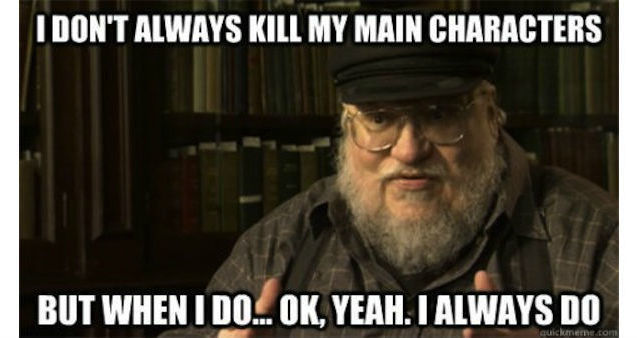

In [150]:
killing_starks = got_unwind.update_many({"name": "Starks"},{"$set": {"status":"DEAD"}})

In [153]:
print(dir(killing_starks)) #Using dir() to access the result of last update
print("Here is the Modified Count and Matched Count:")
print(killing_starks.modified_count, killing_starks.matched_count)

['_UpdateResult__acknowledged', '_UpdateResult__raw_result', '_WriteResult__acknowledged', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_raise_if_unacknowledged', 'acknowledged', 'matched_count', 'modified_count', 'raw_result', 'upserted_id']
Here is the Modified Count and Matched Count:
8 8


In [154]:
for doc in got_unwind.find({"name": "Starks"}):
    print(doc)

{'_id': ObjectId('5970e7ef27aeeddd5c6f205e'), 'name': 'Starks', 'wikiSuffix': 'House_Stark', 'people': {'name': 'Eddard "Ned" Stark', 'description': 'Lord of Winterfell - Warden of the North - Hand of the King - Married to Catelyn (Tully) Stark', 'imageSuffix': 'eddard-stark', 'wikiSuffix': 'Eddard_Stark'}, 'status': 'DEAD'}
{'_id': ObjectId('5970e7ef27aeeddd5c6f205f'), 'name': 'Starks', 'wikiSuffix': 'House_Stark', 'people': {'name': 'Benjen Stark', 'description': "Brother of Eddard Stark - First ranger of the Night's Watch", 'imageSuffix': 'benjen-stark', 'wikiSuffix': 'Benjen_Stark'}, 'status': 'DEAD'}
{'_id': ObjectId('5970e7ef27aeeddd5c6f2060'), 'name': 'Starks', 'wikiSuffix': 'House_Stark', 'people': {'name': 'Robb Stark', 'description': 'Son of Eddard and Catelyn Stark - Direwolf: Grey Wind', 'imageSuffix': 'robb-stark', 'wikiSuffix': 'Robb_Stark'}, 'status': 'DEAD'}
{'_id': ObjectId('5970e7ef27aeeddd5c6f2061'), 'name': 'Starks', 'wikiSuffix': 'House_Stark', 'people': {'name': '